<a href="https://colab.research.google.com/github/gatreddi/python-with-Gen-AI-Machine-leaning-/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/Twitter_Data.csv')

# Show the first few rows
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


In [10]:
print(df.columns.tolist())


['clean_text', 'category']


In [11]:
df = df.rename(columns={'clean_text': 'text', 'category': 'sentiment'})


In [12]:
df['cleaned_text'] = df['text'].apply(clean_text)


In [13]:
# Check column names
print(df.columns.tolist())

# Rename if needed
df = df.rename(columns={'clean_text': 'text', 'category': 'sentiment'})

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(clean_text)


['text', 'sentiment', 'cleaned_text']


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Convert cleaned text into TF-IDF features
X = vectorizer.fit_transform(df['cleaned_text'])


In [15]:
from sklearn.model_selection import train_test_split

# Define target labels
y = df['sentiment']

# Split data into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Remove rows with missing text or sentiment
df = df.dropna(subset=['text', 'sentiment'])


In [18]:
# Apply cleaning again (if needed)
df['cleaned_text'] = df['text'].apply(clean_text)

# Vectorize
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [19]:
print(df.isnull().sum())


text            0
sentiment       0
cleaned_text    0
dtype: int64


In [21]:
from sklearn.metrics import classification_report, confusion_matrix



              precision    recall  f1-score   support

        -1.0       0.88      0.78      0.83      7152
         0.0       0.86      0.97      0.92     11067
         1.0       0.92      0.89      0.90     14375

    accuracy                           0.89     32594
   macro avg       0.89      0.88      0.88     32594
weighted avg       0.89      0.89      0.89     32594



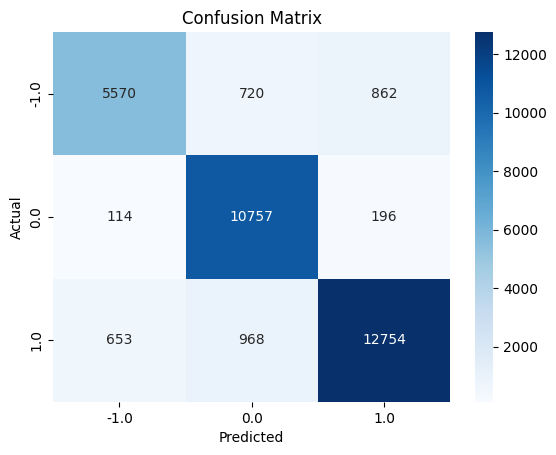

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [23]:
from collections import Counter

pos_words = " ".join(df[df['sentiment'] == 'Positive']['cleaned_text']).split()
neg_words = " ".join(df[df['sentiment'] == 'Negative']['cleaned_text']).split()

print("Most common positive words:", Counter(pos_words).most_common(10))
print("Most common negative words:", Counter(neg_words).most_common(10))


Most common positive words: []
Most common negative words: []
